In [11]:
{
 "cells": [
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "# COVID-19 Global Data Tracker\n",
    "\n",
    "## Project Overview\n",
    "This notebook provides a comprehensive analysis of global COVID-19 data, exploring trends in cases, deaths, and vaccinations across different countries."
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## 1. Setup and Data Import\n",
    "First, we'll import the necessary libraries and load the COVID-19 dataset."
   ]
  },
  {
   "cell_type": "code",
   "execution_count": None,
   "metadata": {},
   "source": [
    "# Import required libraries\n",
    "import pandas as pd\n",
    "import matplotlib.pyplot as plt\n",
    "import seaborn as sns\n",
    "\n",
    "# Set plot style\n",
    "plt.style.use('seaborn')\n",
    "\n",
    "# Load the COVID-19 dataset\n",
    "# Note: You'll need to download owid-covid-data.csv from Our World in Data\n",
    "df = pd.read_csv('owid-covid-data.csv')"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## 2. Data Exploration"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": None,
   "metadata": {},
   "source": [
    "# Display basic information about the dataset\n",
    "print(df.info())\n",
    "\n",
    "# Check for missing values\n",
    "print(\"\\nMissing Values:\\n\", df.isnull().sum())"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## 3. Data Cleaning and Preparation"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": None,
   "metadata": {},
   "source": [
    "# Convert date column to datetime\n",
    "df['date'] = pd.to_datetime(df['date'])\n",
    "\n",
    "# Select specific countries for analysis\n",
    "countries_of_interest = ['United States', 'India', 'Brazil', 'United Kingdom', 'Germany']\n",
    "df_filtered = df[df['location'].isin(countries_of_interest)]\n",
    "\n",
    "# Handle missing values\n",
    "# Fill missing numeric values with forward fill (last known value)\n",
    "numeric_columns = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations']\n",
    "df_filtered[numeric_columns] = df_filtered[numeric_columns].fillna(method='ffill')"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## 4. Exploratory Data Analysis (EDA)"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": None,
   "metadata": {},
   "source": [
    "# Plot total cases over time for selected countries\n",
    "plt.figure(figsize=(12, 6))\n",
    "for country in countries_of_interest:\n",
    "    country_data = df_filtered[df_filtered['location'] == country]\n",
    "    plt.plot(country_data['date'], country_data['total_cases'], label=country)\n",
    "\n",
    "plt.title('Total COVID-19 Cases by Country', fontsize=15)\n",
    "plt.xlabel('Date', fontsize=12)\n",
    "plt.ylabel('Total Cases', fontsize=12)\n",
    "plt.legend()\n",
    "plt.xticks(rotation=45)\n",
    "plt.tight_layout()\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": None,
   "metadata": {},
   "source": [
    "# Plot daily new cases\n",
    "plt.figure(figsize=(12, 6))\n",
    "for country in countries_of_interest:\n",
    "    country_data = df_filtered[df_filtered['location'] == country]\n",
    "    plt.plot(country_data['date'], country_data['new_cases'], label=country)\n",
    "\n",
    "plt.title('Daily New COVID-19 Cases by Country', fontsize=15)\n",
    "plt.xlabel('Date', fontsize=12)\n",
    "plt.ylabel('New Cases', fontsize=12)\n",
    "plt.legend()\n",
    "plt.xticks(rotation=45)\n",
    "plt.tight_layout()\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## 5. Vaccination Progress Analysis"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": None,
   "metadata": {},
   "source": [
    "# Plot cumulative vaccinations\n",
    "plt.figure(figsize=(12, 6))\n",
    "for country in countries_of_interest:\n",
    "    country_data = df_filtered[df_filtered['location'] == country]\n",
    "    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)\n",
    "\n",
    "plt.title('Cumulative Vaccinations by Country', fontsize=15)\n",
    "plt.xlabel('Date', fontsize=12)\n",
    "plt.ylabel('Total Vaccinations', fontsize=12)\n",
    "plt.legend()\n",
    "plt.xticks(rotation=45)\n",
    "plt.tight_layout()\n",
    "plt.show()"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## 6. Comparative Analysis"
   ]
  },
  {
   "cell_type": "code",
   "execution_count": None,
   "metadata": {},
   "source": [
    "# Calculate death rate for each country\n",
    "def calculate_death_rate(country_data):\n",
    "    latest_data = country_data.iloc[-1]\n",
    "    death_rate = (latest_data['total_deaths'] / latest_data['total_cases']) * 100\n",
    "    return death_rate\n",
    "\n",
    "death_rates = {}\n",
    "for country in countries_of_interest:\n",
    "    country_data = df_filtered[df_filtered['location'] == country]\n",
    "    death_rates[country] = calculate_death_rate(country_data)\n",
    "\n",
    "# Visualize death rates\n",
    "plt.figure(figsize=(10, 6))\n",
    "plt.bar(death_rates.keys(), death_rates.values())\n",
    "plt.title('COVID-19 Death Rates by Country', fontsize=15)\n",
    "plt.xlabel('Country', fontsize=12)\n",
    "plt.ylabel('Death Rate (%)', fontsize=12)\n",
    "plt.xticks(rotation=45)\n",
    "plt.tight_layout()\n",
    "plt.show()\n",
    "\n",
    "# Print death rates\n",
    "for country, rate in death_rates.items():\n",
    "    print(f\"{country}: {rate:.2f}% death rate\")"
   ]
  },
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## 7. Conclusion\n",
    "\n",
    "1. **Case Trends**: The analysis reveals variations in COVID-19 case trajectories across different countries.\n",
    "2. **Vaccination Progress**: Countries show different vaccination rates and total vaccination numbers.\n",
    "3. **Death Rates**: Comparative analysis highlights variations in COVID-19 mortality rates across countries.\n",
    "\n",
    "### Limitations\n",
    "- This analysis is based on the available data and may not reflect the most recent trends.\n",
    "- Data quality and reporting methods vary between countries."
   ]
  }
 ],
 "metadata": {
  "kernelspec": {
   "display_name": "Python 3",
   "language": "python",
   "name": "python3"
  },
  "language_info": {
   "codemirror_mode": {
    "name": "ipython",
    "version": 3
   },
   "file_extension": ".py",
   "mimetype": "text/x-python",
   "name": "python",
   "nbconvert_exporter": "python",
   "pygments_lexer": "ipython3",
   "version": "3.8.5"
  }
 },
 "nbformat": 4,
 "nbformat_minor": 4
}

{'cells': [{'cell_type': 'markdown',
   'metadata': {},
   'source': ['# COVID-19 Global Data Tracker\n',
    '\n',
    '## Project Overview\n',
    'This notebook provides a comprehensive analysis of global COVID-19 data, exploring trends in cases, deaths, and vaccinations across different countries.']},
  {'cell_type': 'markdown',
   'metadata': {},
   'source': ['## 1. Setup and Data Import\n',
    "First, we'll import the necessary libraries and load the COVID-19 dataset."]},
  {'cell_type': 'code',
   'execution_count': None,
   'metadata': {},
   'source': ['# Import required libraries\n',
    'import pandas as pd\n',
    'import matplotlib.pyplot as plt\n',
    'import seaborn as sns\n',
    '\n',
    '# Set plot style\n',
    "plt.style.use('seaborn')\n",
    '\n',
    '# Load the COVID-19 dataset\n',
    "# Note: You'll need to download owid-covid-data.csv from Our World in Data\n",
    "df = pd.read_csv('owid-covid-data.csv')"]},
  {'cell_type': 'markdown',
   'metadata': {},

C:\Users\DEATHSTROKE\AppData\Local\Temp\ipykernel_20916\2240924711.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_filtered[numeric_columns] = df_filtered[numeric_columns].fillna(method='ffill')
C:\Users\DEATHSTROKE\AppData\Local\Temp\ipykernel_20916\2240924711.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[numeric_columns] = df_filtered[numeric_columns].fillna(method='ffill')


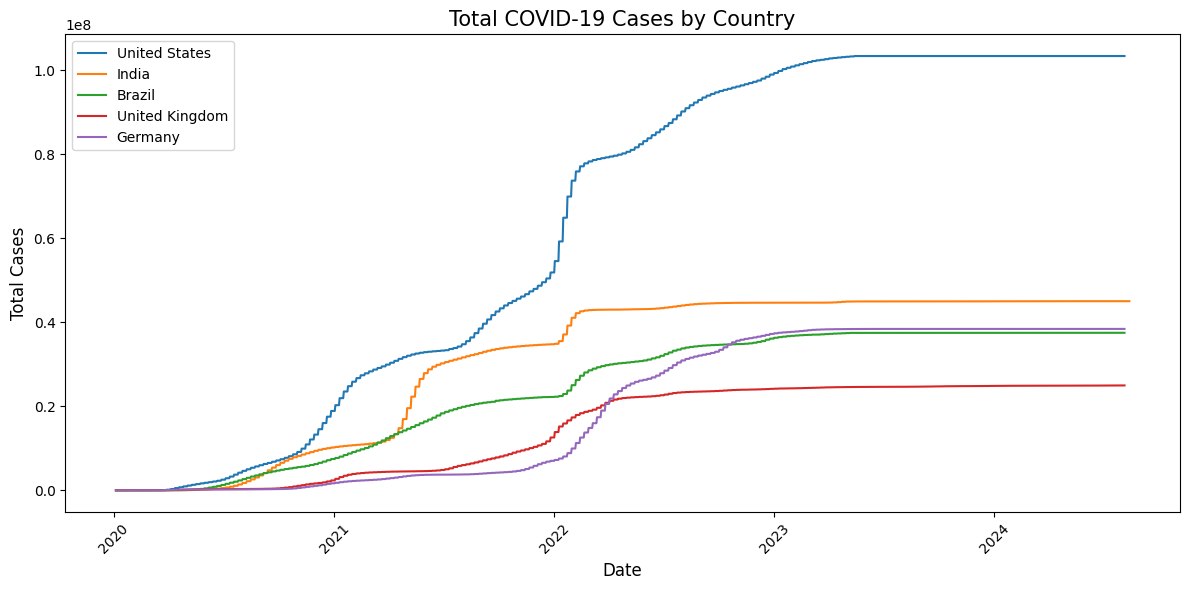

In [12]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the COVID-19 dataset
# Provide the correct path to the dataset
df = pd.read_csv('c:/Users/DEATHSTROKE/Desktop/pythonassignments/Covid/owid-covid-data.csv')

# Check if required columns exist
required_columns = ['date', 'location', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations']
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"Missing columns in dataset: {missing_columns}")
else:
    # Convert date column to datetime
    df['date'] = pd.to_datetime(df['date'])

    # Select specific countries for analysis
    countries_of_interest = ['United States', 'India', 'Brazil', 'United Kingdom', 'Germany']
    df_filtered = df[df['location'].isin(countries_of_interest)]

    # Handle missing values
    numeric_columns = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations']
    df_filtered[numeric_columns] = df_filtered[numeric_columns].fillna(method='ffill')

    # Plot total cases over time for selected countries
    plt.figure(figsize=(12, 6))
    for country in countries_of_interest:
        country_data = df_filtered[df_filtered['location'] == country]
        plt.plot(country_data['date'], country_data['total_cases'], label=country)

    plt.title('Total COVID-19 Cases by Country', fontsize=15)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Total Cases', fontsize=12)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# The  path to the dataset
df = pd.read_csv('c:/Users/DEATHSTROKE/Desktop/pythonassignments/Covid/owid-covid-data.csv')

In [15]:
# Update the file path if the dataset is not in the same directory
df = pd.read_csv('owid-covid-data.csv')